## The Imports

In [1]:
from pandas_datareader import data, wb
import datetime as dt
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

In [3]:
start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2022, 4, 14)

In [11]:
# Apple Inc.
Apple = data.DataReader('AAPL', 'yahoo', start, end)

# AMAZON
Amazon = data.DataReader('AMZN', 'yahoo', start, end)

# Nvidia Corp.
Nvidia = data.DataReader('NVDA', 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader('JPM', 'yahoo', start, end)

# Microsoft Corp.
MS = data.DataReader('MSFT', 'yahoo', start, end)


In [12]:
df = data.DataReader(['AAPL', 'AMZN', 'NVDA', 'JPM', 'MSFT'],'yahoo', start, end)

In [13]:
tickers = ['AAPL', 'AMZN', 'NVDA', 'JPM', 'MSFT']

In [14]:
company_stocks = pd.concat([Apple, Amazon, Nvidia, JPM, MS],axis=1,keys=tickers)

In [15]:
company_stocks.columns.names = ['Ticker','Stock Info']

In [16]:
company_stocks.head()

Ticker           AAPL                                                \
Stock Info       High        Low       Open      Close       Volume   
Date                                                                  
2011-01-03  11.795000  11.601429  11.630000  11.770357  445138400.0   
2011-01-04  11.875000  11.719643  11.872857  11.831786  309080800.0   
2011-01-05  11.940714  11.767857  11.769643  11.928571  255519600.0   
2011-01-06  11.973214  11.889286  11.954286  11.918929  300428800.0   
2011-01-07  12.012500  11.853571  11.928214  12.004286  311931200.0   

Ticker                       AMZN                                      ...  \
Stock Info  Adj Close        High         Low        Open       Close  ...   
Date                                                                   ...   
2011-01-03  10.078654  186.000000  181.210007  181.369995  184.220001  ...   
2011-01-04  10.131251  187.699997  183.779999  186.149994  185.009995  ...   
2011-01-05  10.214127  187.449997  184.070007  184.100006  187.419998  ...   
2011-01-06  10.205871  187.410004  185.250000  186.500000  185.860001  ...   
2011-01-07  10.278959  188.449997  183.740005  187.880005  185.490005  ...   

Ticker            JPM                                     MSFT             \
Stock Info       Open      Close      Volume  Adj Close   High        Low   
Date                                                                        
2011-01-03  43.000000  43.580002  43278500.0  31.945518  28.18  27.920000   
2011-01-04  43.779999  44.160000  40036800.0  32.407860  28.17  27.850000   
2011-01-05  43.919998  44.700001  50032500.0  32.804146  28.01  27.770000   
2011-01-06  44.400002  44.480000  31606200.0  32.642696  28.85  27.860001   
2011-01-07  44.540001  43.639999  69579400.0  32.026241  28.74  28.250000   

Ticker                                               
Stock Info       Open  Close      Volume  Adj Close  
Date                                                 
2011-01-03  28.049999  27.98  53443800.0  22.015612  
2011-01-04  27.940001  28.09  54405600.0  22.102165  
2011-01-05  27.900000  28.00  58998700.0  22.031347  
2011-01-06  28.040001  28.82  88026300.0  22.676544  
2011-01-07  28.639999  28.60  73762000.0  22.503447  

[5 rows x 30 columns]

## EDA

In [17]:
company_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Ticker
AAPL     182.009995
AMZN    3731.409912
NVDA     333.760010
JPM      171.779999
MSFT     343.109985
dtype: float64

In [18]:
returns = pd.DataFrame()

In [19]:
for ticker in tickers:
    returns[ticker+' Return'] = company_stocks[ticker]['Close'].pct_change()
returns.head()

,AAPL Return,AMZN Return,NVDA Return,JPM Return,MSFT Return
Date,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN
2011-01-04,0.005219,0.004288,-0.003161,0.013309,0.003931
2011-01-05,0.008180,0.013026,0.076728,0.012228,-0.003204
2011-01-06,-0.000808,-0.008324,0.138398,-0.004922,0.029286
2011-01-07,0.007161,-0.001991,0.027936,-0.018885,-0.007634


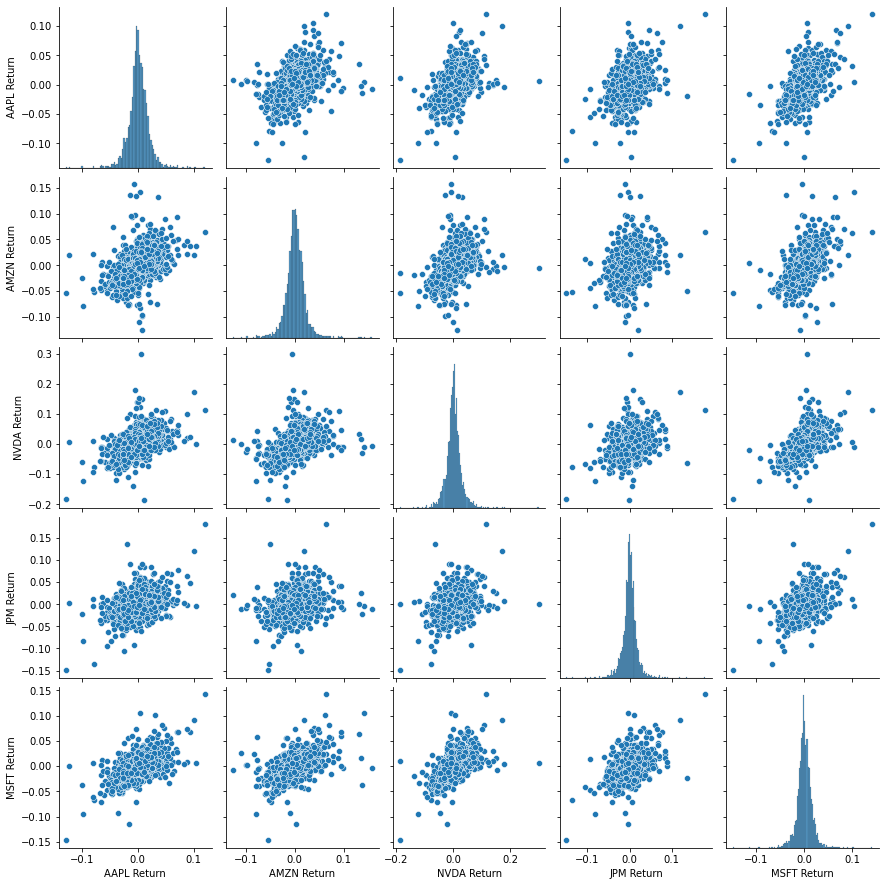

In [20]:
import seaborn as sns
sns.pairplot(returns[1:])

In [21]:
returns.idxmin()

AAPL Return   2020-03-16
AMZN Return   2011-10-26
NVDA Return   2018-11-16
JPM Return    2020-03-16
MSFT Return   2020-03-16
dtype: datetime64[ns]

In [22]:
returns.idxmax()

AAPL Return   2020-03-13
AMZN Return   2012-04-27
NVDA Return   2016-11-11
JPM Return    2020-03-13
MSFT Return   2020-03-13
dtype: datetime64[ns]

In [23]:
returns.std()

AAPL Return    0.017783
AMZN Return    0.019867
NVDA Return    0.027285
JPM Return     0.017832
MSFT Return    0.016112
dtype: float64

In [24]:
returns.loc['2020-01-01':'2020-12-31'].std()

AAPL Return    0.029392
AMZN Return    0.024261
NVDA Return    0.036426
JPM Return     0.034272
MSFT Return    0.027649
dtype: float64

<AxesSubplot:xlabel='NVDA Return', ylabel='Density'>

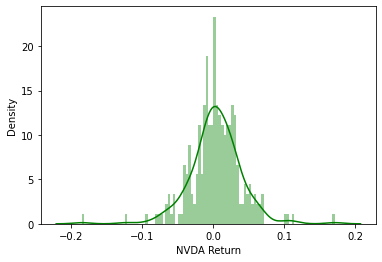

In [27]:
sns.distplot(returns.loc['2020-01-01':'2020-12-31']['NVDA Return'],color='green',bins=100)

## More visualizations

In [29]:
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

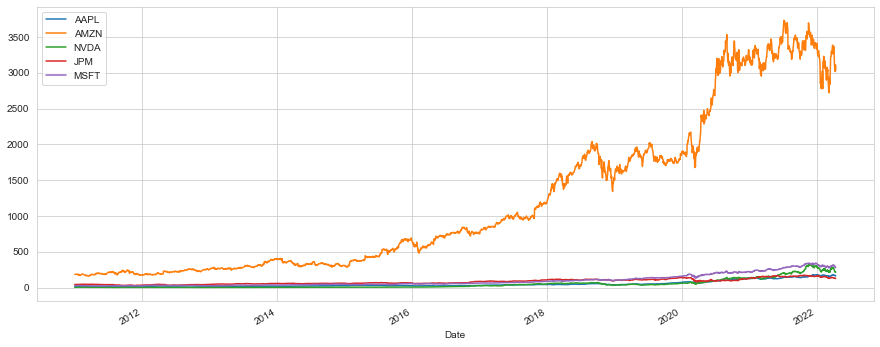

In [31]:
for ticker in tickers:
    company_stocks[ticker]['Close'].plot(figsize=(15,6), label = ticker)
plt.legend()

<AxesSubplot:xlabel='Date'>

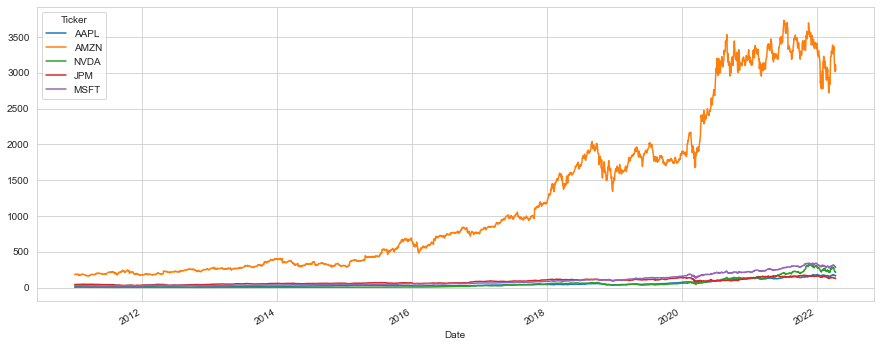

In [32]:
company_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(15,6))

In [33]:
company_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

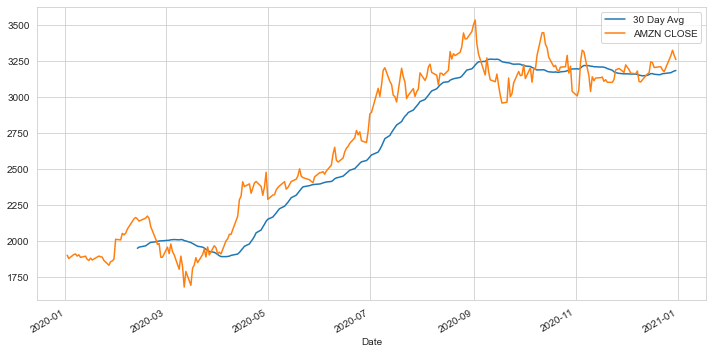

In [34]:
plt.figure(figsize=(12,6))
Amazon['Close'].loc['2020-01-01':'2020-12-31'].rolling(window=30).mean().plot(label='30 Day Avg')
Amazon['Close'].loc['2020-01-01':'2020-12-31'].plot(label='AMZN CLOSE')
plt.legend()

In [35]:
Amazon['Close'].loc['2020-01-01':'2020-12-31'].ta_plot(study='boll')